<a href="https://colab.research.google.com/github/Charly1368/Modulo-2---Modelos-Estad-sticos/blob/main/Aplicaci%C3%B3n_TLC_y_la_Ley_de_los_grandes_n%C3%BAmeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aplicación TLC y la Ley de los grandes números





=== DEMOSTRACIÓN DEL TEOREMA CENTRAL DEL LÍMITE ===

Ejemplo 1: Distribución Exponencial


<Figure size 1200x800 with 0 Axes>

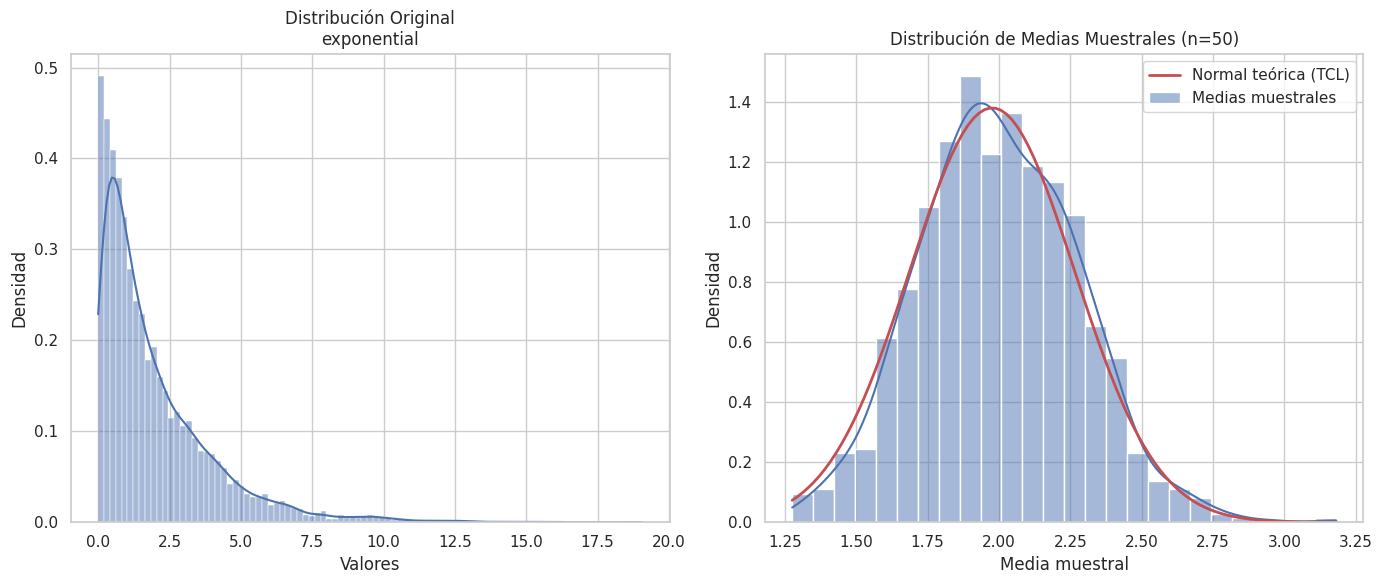


Prueba de normalidad Shapiro-Wilk:
Estadístico = 0.9968, p-valor = 0.0392
Las medias muestrales NO parecen normales

Comparación de momentos:
Media muestral observada: 1.9991
Media teórica esperada: 1.9763
Desviación estándar observada: 0.2760
Desviación estándar teórica: 0.2890

Ejemplo 2: Distribución Uniforme


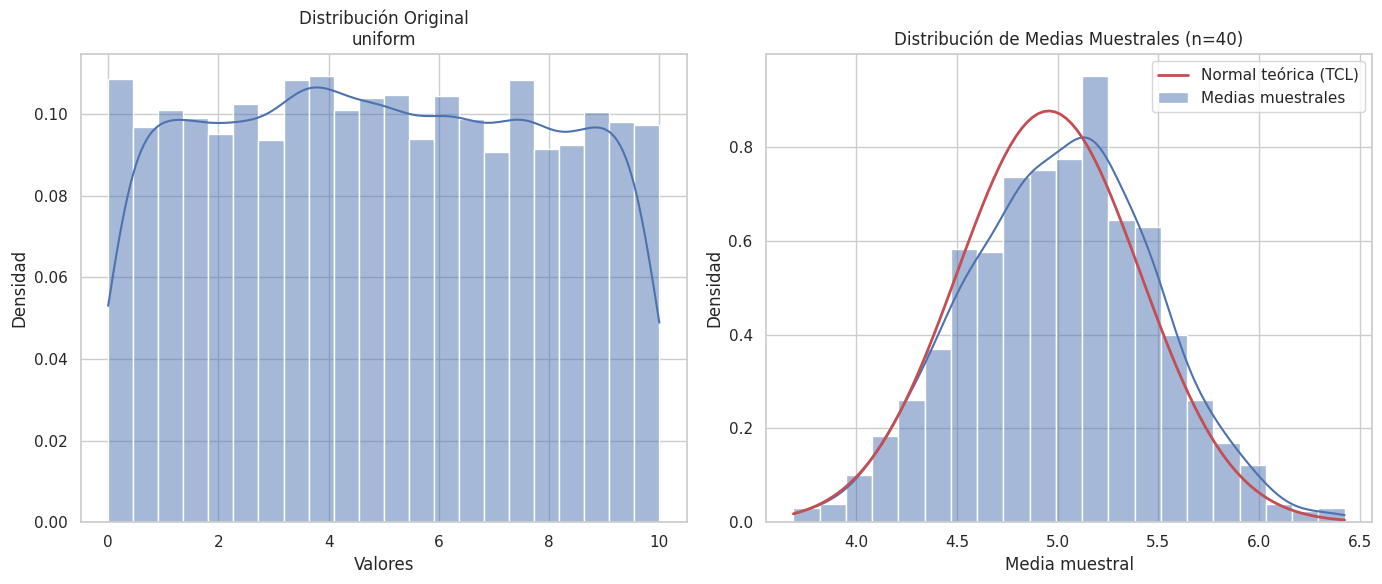


Prueba de normalidad Shapiro-Wilk:
Estadístico = 0.9985, p-valor = 0.5389
Las medias muestrales parecen normales

Comparación de momentos:
Media muestral observada: 5.0115
Media teórica esperada: 4.9561
Desviación estándar observada: 0.4662
Desviación estándar teórica: 0.4551

Ejemplo 3: Distribución Binomial


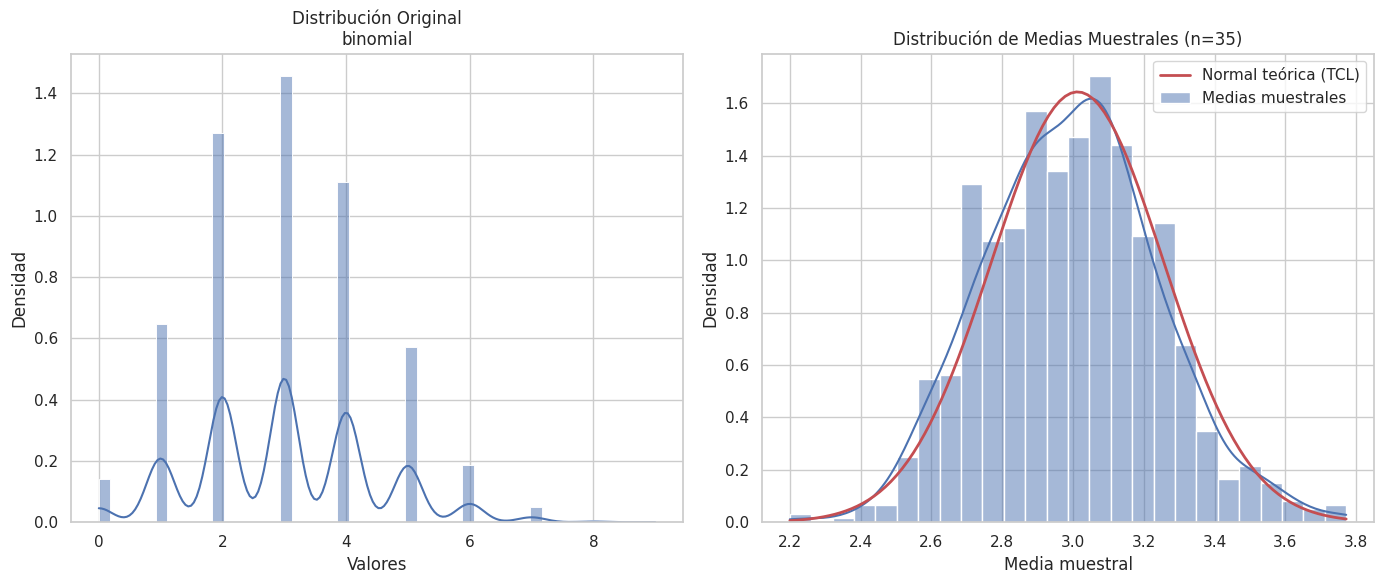


Prueba de normalidad Shapiro-Wilk:
Estadístico = 0.9964, p-valor = 0.0201
Las medias muestrales NO parecen normales

Comparación de momentos:
Media muestral observada: 2.9956
Media teórica esperada: 3.0127
Desviación estándar observada: 0.2426
Desviación estándar teórica: 0.2428

Ejemplo 4: Distribución Poisson


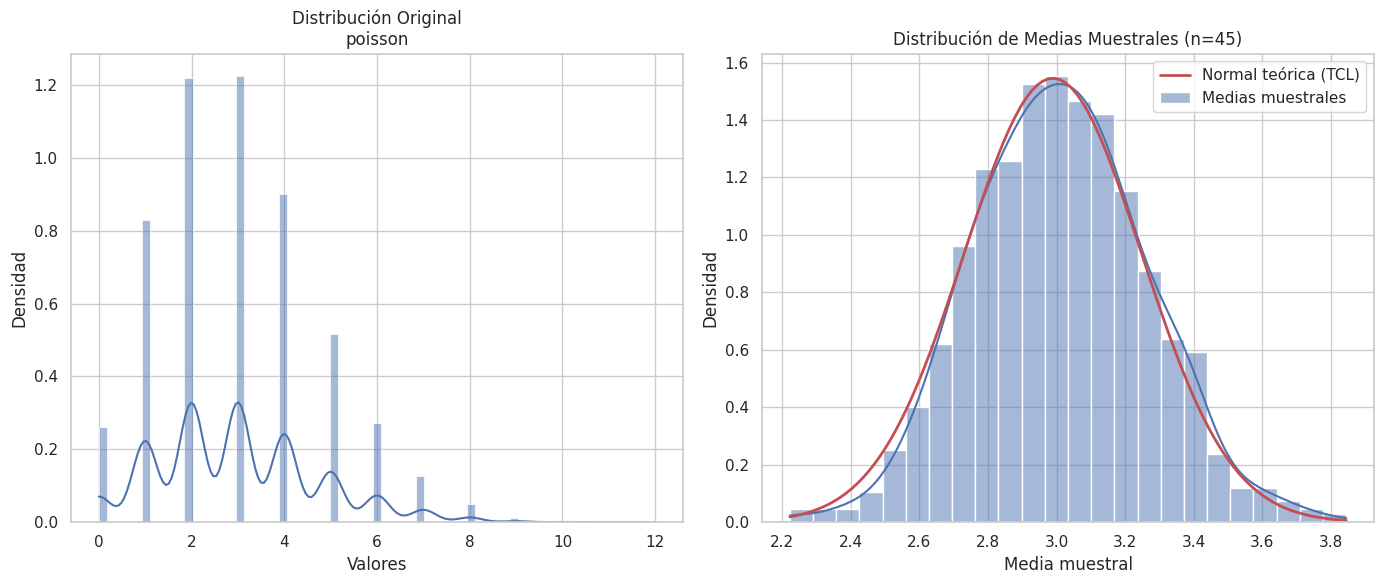


Prueba de normalidad Shapiro-Wilk:
Estadístico = 0.9979, p-valor = 0.2365
Las medias muestrales parecen normales

Comparación de momentos:
Media muestral observada: 3.0098
Media teórica esperada: 2.9892
Desviación estándar observada: 0.2516
Desviación estándar teórica: 0.2582


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

def demostracion_tcl(distribucion, parametros, tamano_muestra=30, num_muestras=1000):
    """
    Demostración visual del Teorema Central del Límite

    Parámetros:
    distribucion -- función de distribución de numpy (ej. np.random.exponential)
    parametros -- diccionario con parámetros de la distribución
    tamano_muestra -- tamaño de cada muestra (n)
    num_muestras -- número de muestras a generar
    """

    # 1. Generar muestras de la distribución original
    datos_originales = distribucion(**parametros, size=10000)

    # 2. Calcular medias muestrales
    medias = np.zeros(num_muestras)
    for i in range(num_muestras):
        muestra = distribucion(**parametros, size=tamano_muestra)
        medias[i] = np.mean(muestra)

    # 3. Calcular parámetros teóricos para la distribución normal
    media_teorica = np.mean(datos_originales)
    desviacion_teorica = np.std(datos_originales) / np.sqrt(tamano_muestra)

    # 4. Crear gráficos
    plt.figure(figsize=(14, 6))

    # Distribución original
    plt.subplot(1, 2, 1)
    sns.histplot(datos_originales, kde=True, stat="density")
    plt.title(f"Distribución Original\n{distribucion.__name__}")
    plt.xlabel("Valores")
    plt.ylabel("Densidad")

    # Distribución de medias muestrales
    plt.subplot(1, 2, 2)
    sns.histplot(medias, kde=True, stat="density", label="Medias muestrales")

    # Distribución normal teórica según TCL
    x = np.linspace(min(medias), max(medias), 100)
    y = stats.norm.pdf(x, media_teorica, desviacion_teorica)
    plt.plot(x, y, 'r-', linewidth=2, label="Normal teórica (TCL)")

    plt.title(f"Distribución de Medias Muestrales (n={tamano_muestra})")
    plt.xlabel("Media muestral")
    plt.ylabel("Densidad")
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 5. Prueba de normalidad (Shapiro-Wilk)
    if num_muestras <= 5000:  # Límite para la prueba de Shapiro
        stat, p = stats.shapiro(medias)
        print(f"\nPrueba de normalidad Shapiro-Wilk:")
        print(f"Estadístico = {stat:.4f}, p-valor = {p:.4f}")
        print("Las medias muestrales parecen normales" if p > 0.05 else
              "Las medias muestrales NO parecen normales")

    # 6. Comparación de momentos
    print("\nComparación de momentos:")
    print(f"Media muestral observada: {np.mean(medias):.4f}")
    print(f"Media teórica esperada: {media_teorica:.4f}")
    print(f"Desviación estándar observada: {np.std(medias):.4f}")
    print(f"Desviación estándar teórica: {desviacion_teorica:.4f}")

# Ejemplos de uso
if __name__ == "__main__":
    print("=== DEMOSTRACIÓN DEL TEOREMA CENTRAL DEL LÍMITE ===")

    # Ejemplo 1: Distribución exponencial
    print("\nEjemplo 1: Distribución Exponencial")
    demostracion_tcl(np.random.exponential, {'scale': 2}, tamano_muestra=50)

    # Ejemplo 2: Distribución uniforme
    print("\nEjemplo 2: Distribución Uniforme")
    demostracion_tcl(np.random.uniform, {'low': 0, 'high': 10}, tamano_muestra=40)

    # Ejemplo 3: Distribución binomial (discreta)
    print("\nEjemplo 3: Distribución Binomial")
    demostracion_tcl(np.random.binomial, {'n': 10, 'p': 0.3}, tamano_muestra=35)

    # Ejemplo 4: Distribución Poisson
    print("\nEjemplo 4: Distribución Poisson")
    demostracion_tcl(np.random.poisson, {'lam': 3}, tamano_muestra=45)

=== DEMOSTRACIÓN DE LA LEY DE LOS GRANDES NÚMEROS ===

Ejemplo 1: Lanzamiento de moneda (Binomial)

Resultados finales:
Valor esperado teórico: 0.5000
Promedio observado con n=5000: 0.5028
Error relativo: 0.57%
Desviación estándar de las medias: 0.0712


<Figure size 1200x800 with 0 Axes>

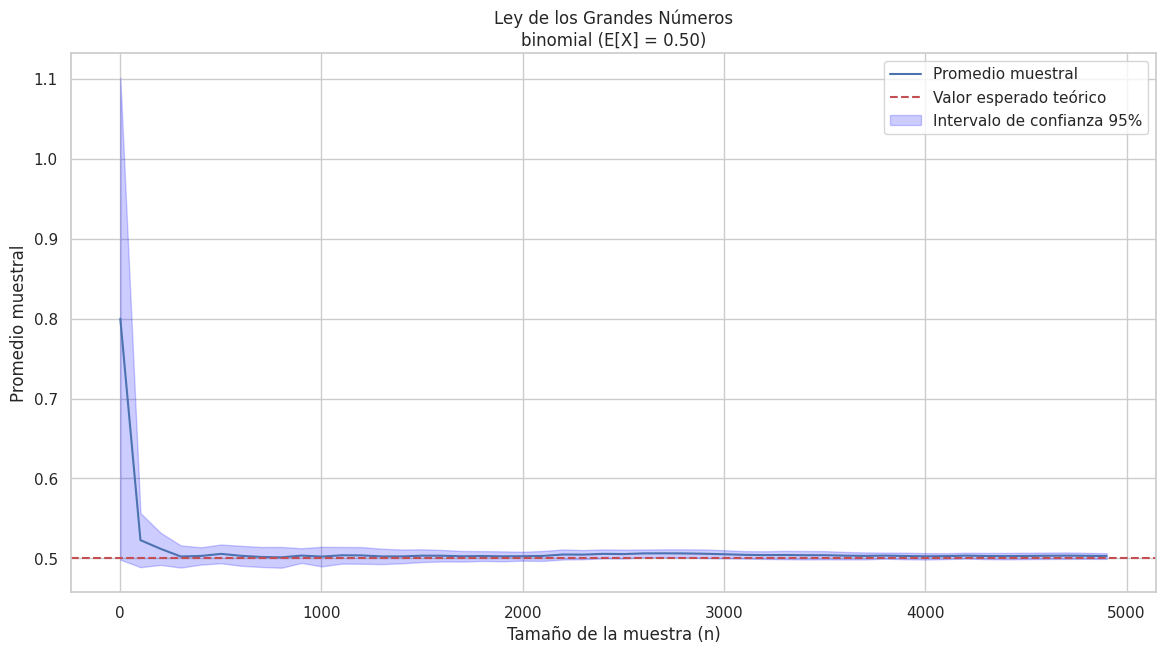


Ejemplo 2: Dado justo (Uniforme)

Resultados finales:
Valor esperado teórico: 3.4963
Promedio observado con n=10000: 3.5045
Error relativo: 0.23%
Desviación estándar de las medias: 0.1773


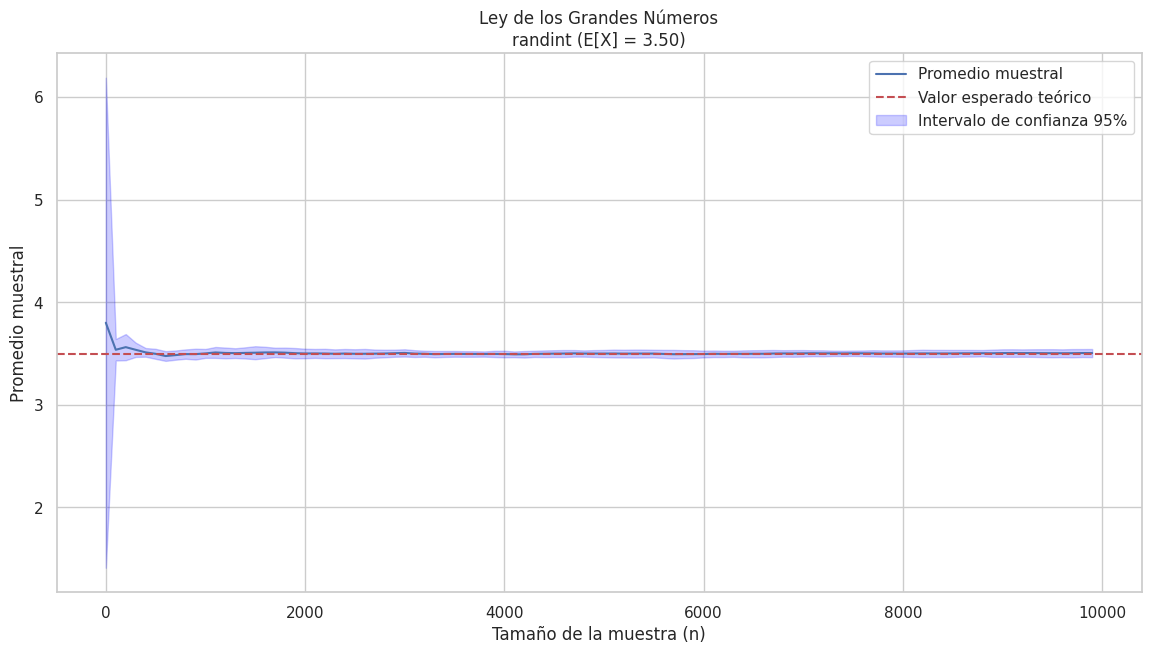


Ejemplo 3: Tiempo entre llegadas (Exponencial)

Resultados finales:
Valor esperado teórico: 2.5000
Promedio observado con n=20000: 2.4956
Error relativo: 0.18%
Desviación estándar de las medias: 0.1580


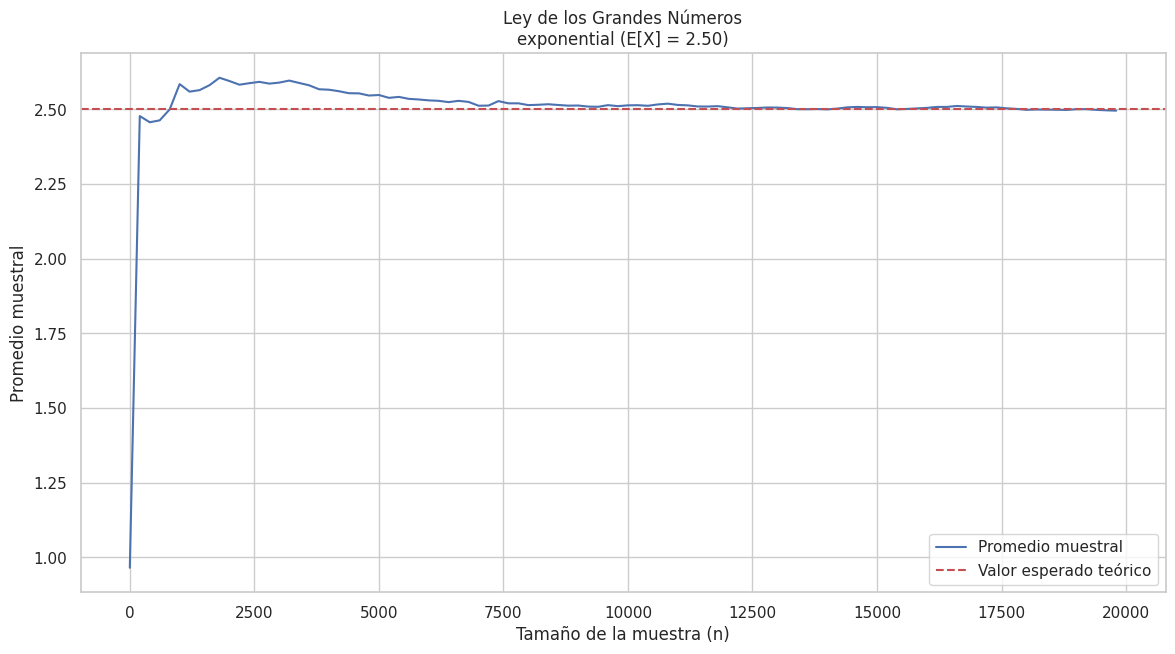


Ejemplo 4: Distribución Normal

Resultados finales:
Valor esperado teórico: 10.0000
Promedio observado con n=15000: 9.9906
Error relativo: 0.09%
Desviación estándar de las medias: 0.1848


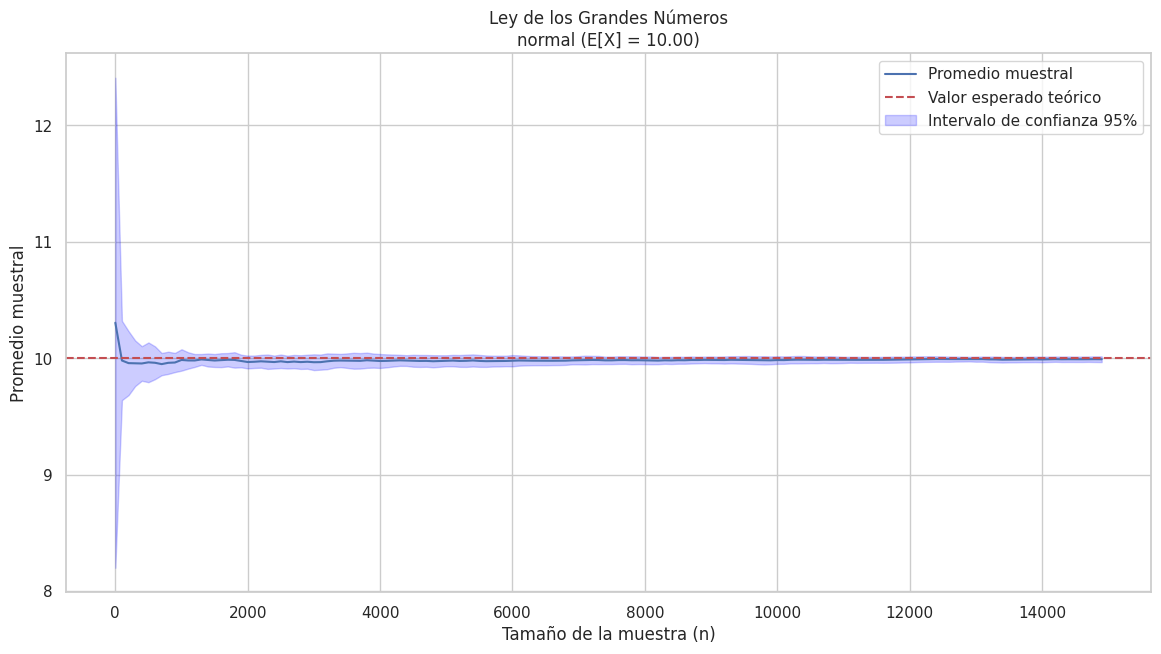


Ejemplo 5: Distribución Poisson

Resultados finales:
Valor esperado teórico: 0.8000
Promedio observado con n=30000: 0.8010
Error relativo: 0.12%
Desviación estándar de las medias: 0.0801


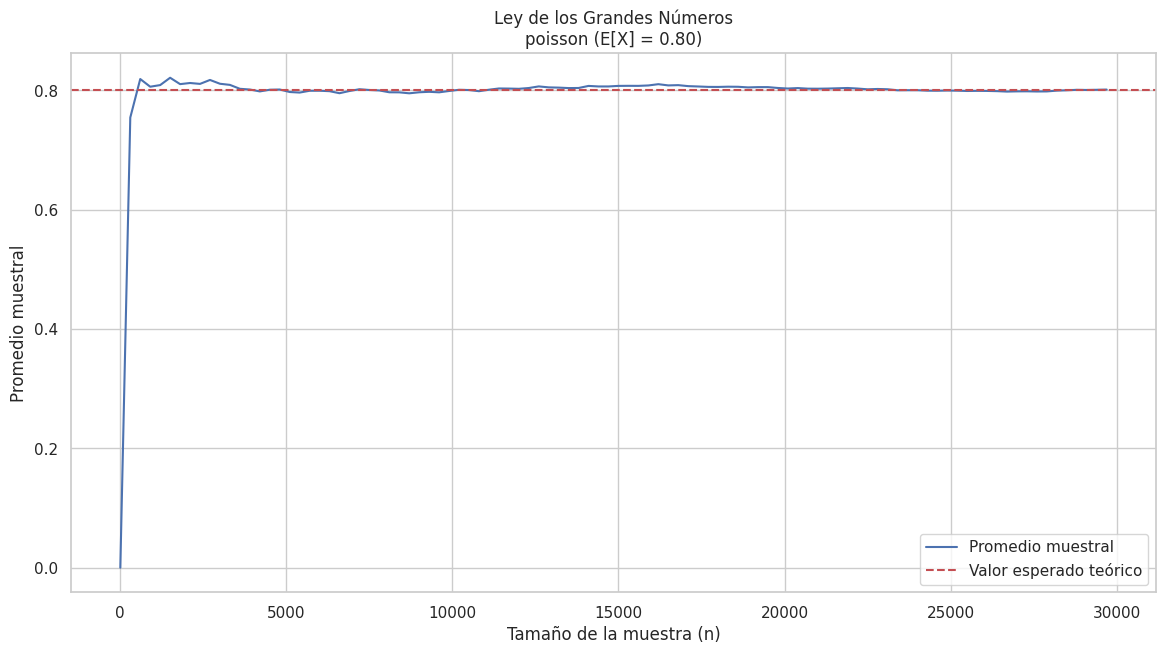

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

def ley_grandes_numeros(distribucion, parametros, max_muestras=10000, paso=100, repeticiones=1):
    """
    Demostración visual de la Ley de los Grandes Números

    Parámetros:
    distribucion -- función de distribución de numpy (ej. np.random.binomial)
    parametros -- diccionario con parámetros de la distribución
    max_muestras -- número máximo de muestras a generar
    paso -- incremento entre puntos de muestra
    repeticiones -- número de repeticiones para promediar (suavizar)
    """

    # Calcular el valor esperado teórico
    if distribucion == np.random.binomial:
        esperado = parametros['n'] * parametros['p']
    elif distribucion == np.random.poisson:
        esperado = parametros['lam']
    elif distribucion == np.random.exponential:
        esperado = parametros['scale']
    elif distribucion == np.random.uniform:
        esperado = (parametros['low'] + parametros['high']) / 2
    elif distribucion == np.random.normal:
        esperado = parametros['loc']
    else:
        # Método empírico si no conocemos la fórmula teórica
        esperado = np.mean(distribucion(**parametros, size=100000))

    # Configurar figura
    plt.figure(figsize=(14, 7))

    # Realizar múltiples repeticiones para suavizar
    promedios_acumulados = np.zeros((repeticiones, max_muestras // paso))

    for rep in range(repeticiones):
        # Generar muestras
        muestras = distribucion(**parametros, size=max_muestras)

        # Calcular promedios acumulados
        promedios = [np.mean(muestras[:n]) for n in range(1, max_muestras+1, paso)]
        promedios_acumulados[rep] = promedios

    # Calcular promedio de las repeticiones
    if repeticiones > 1:
        promedios_finales = np.mean(promedios_acumulados, axis=0)
        intervalo_confianza = stats.t.interval(0.95, repeticiones-1,
                                             loc=promedios_finales,
                                             scale=stats.sem(promedios_acumulados, axis=0))
    else:
        promedios_finales = promedios_acumulados[0]

    # Crear gráfico
    tamanos_muestra = np.arange(1, max_muestras+1, paso)
    plt.plot(tamanos_muestra, promedios_finales, label='Promedio muestral')
    plt.axhline(esperado, color='r', linestyle='--', label='Valor esperado teórico')

    if repeticiones > 1:
        plt.fill_between(tamanos_muestra, intervalo_confianza[0], intervalo_confianza[1],
                        color='blue', alpha=0.2, label='Intervalo de confianza 95%')

    plt.title(f"Ley de los Grandes Números\n{distribucion.__name__} (E[X] = {esperado:.2f})")
    plt.xlabel("Tamaño de la muestra (n)")
    plt.ylabel("Promedio muestral")
    plt.legend()
    plt.grid(True)

    # Mostrar información estadística
    ultimo_promedio = promedios_finales[-1]
    error_relativo = abs(ultimo_promedio - esperado) / abs(esperado) * 100

    print("\nResultados finales:")
    print(f"Valor esperado teórico: {esperado:.4f}")
    print(f"Promedio observado con n={max_muestras}: {ultimo_promedio:.4f}")
    print(f"Error relativo: {error_relativo:.2f}%")
    print(f"Desviación estándar de las medias: {np.std(promedios_acumulados):.4f}")

    plt.show()

# Ejemplos de uso
if __name__ == "__main__":
    print("=== DEMOSTRACIÓN DE LA LEY DE LOS GRANDES NÚMEROS ===")

    # Ejemplo 1: Lanzamiento de moneda (Binomial)
    print("\nEjemplo 1: Lanzamiento de moneda (Binomial)")
    ley_grandes_numeros(np.random.binomial, {'n': 1, 'p': 0.5}, max_muestras=5000, repeticiones=10)

    # Ejemplo 2: Dado justo (Uniforme discreta)
    print("\nEjemplo 2: Dado justo (Uniforme)")
    ley_grandes_numeros(np.random.randint, {'low': 1, 'high': 7}, max_muestras=10000, repeticiones=5)

    # Ejemplo 3: Tiempo entre llegadas (Exponencial)
    print("\nEjemplo 3: Tiempo entre llegadas (Exponencial)")
    ley_grandes_numeros(np.random.exponential, {'scale': 2.5}, max_muestras=20000, paso=200)

    # Ejemplo 4: Distribución normal
    print("\nEjemplo 4: Distribución Normal")
    ley_grandes_numeros(np.random.normal, {'loc': 10, 'scale': 3}, max_muestras=15000, repeticiones=7)

    # Ejemplo 5: Distribución Poisson (eventos raros)
    print("\nEjemplo 5: Distribución Poisson")
    ley_grandes_numeros(np.random.poisson, {'lam': 0.8}, max_muestras=30000, paso=300)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

## Función de Densidad Normal Bivariada

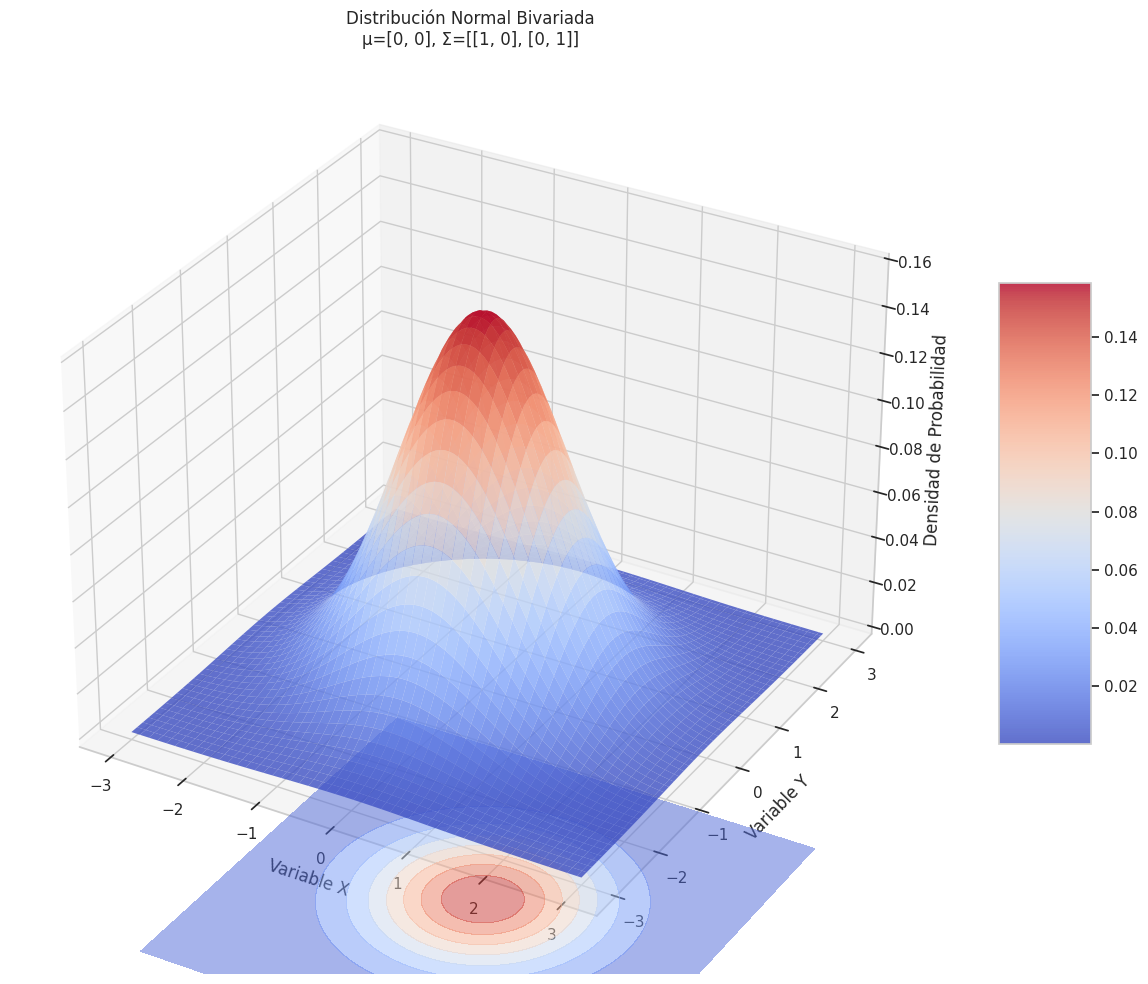

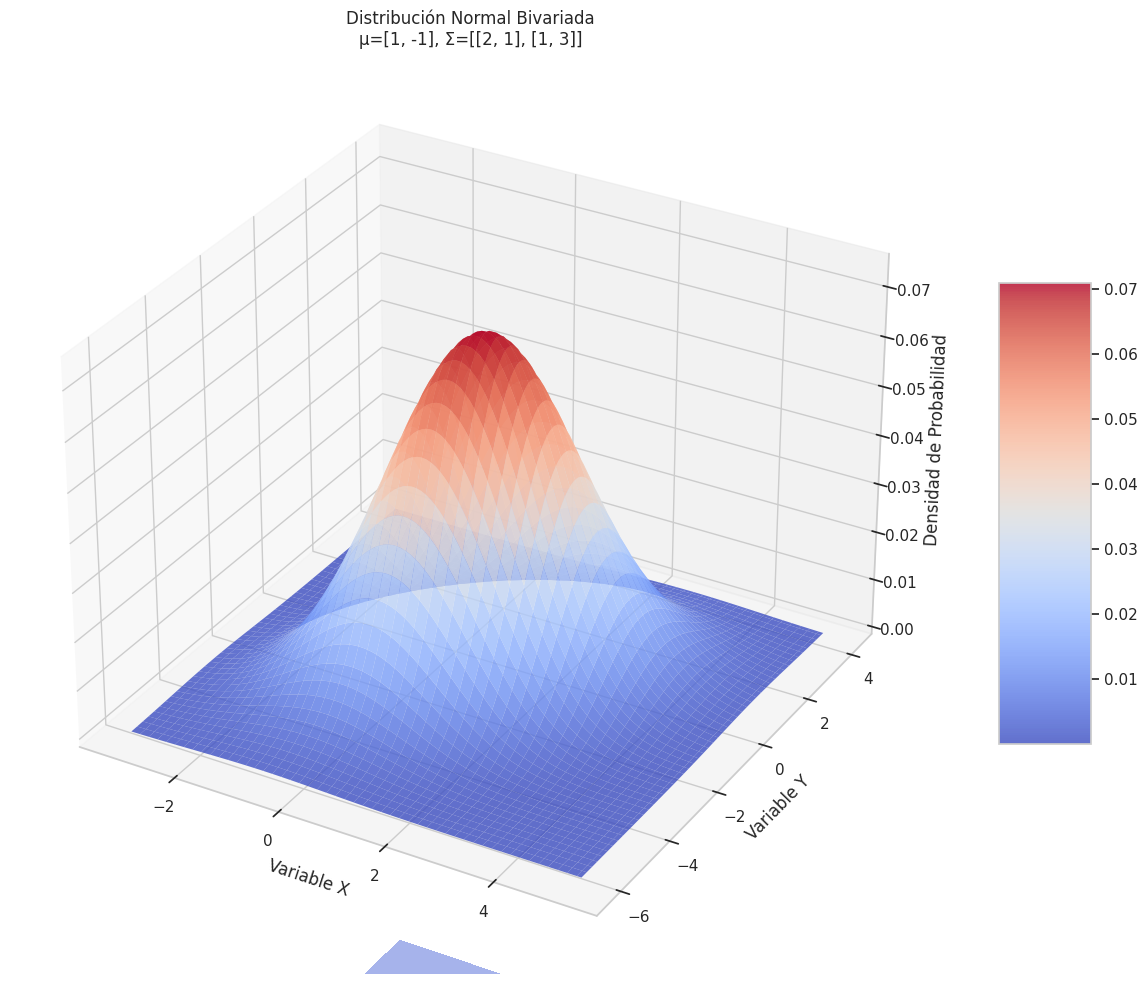

In [10]:
def densidad_normal_3d(mu=[0, 0], sigma=[[1, 0], [0, 1]]):
    """
    Visualización 3D de una distribución normal bivariada

    Parámetros:
    mu -- vector de medias [mu_x, mu_y]
    sigma -- matriz de covarianza [[var_x, cov_xy], [cov_yx, var_y]]
    """
    # Crear grid de puntos
    x = np.linspace(mu[0]-3*np.sqrt(sigma[0][0]), mu[0]+3*np.sqrt(sigma[0][0]), 100)
    y = np.linspace(mu[1]-3*np.sqrt(sigma[1][1]), mu[1]+3*np.sqrt(sigma[1][1]), 100)
    X, Y = np.meshgrid(x, y)

    # Calcular densidad de probabilidad
    rv = multivariate_normal(mu, sigma)
    Z = rv.pdf(np.dstack((X, Y)))

    # Crear figura 3D
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar superficie
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True, alpha=0.8)

    # Añadir curvas de nivel en el plano base
    cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.coolwarm, alpha=0.5)

    # Configuración de ejes y título
    ax.set_xlabel('Variable X')
    ax.set_ylabel('Variable Y')
    ax.set_zlabel('Densidad de Probabilidad')
    ax.set_title(f'Distribución Normal Bivariada\nμ={mu}, Σ={sigma}')

    # Añadir barra de colores
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.tight_layout()
    plt.show()

# Ejemplos de uso
densidad_normal_3d()  # Distribución normal estándar
densidad_normal_3d(mu=[1, -1], sigma=[[2, 1], [1, 3]])  # Con covarianza

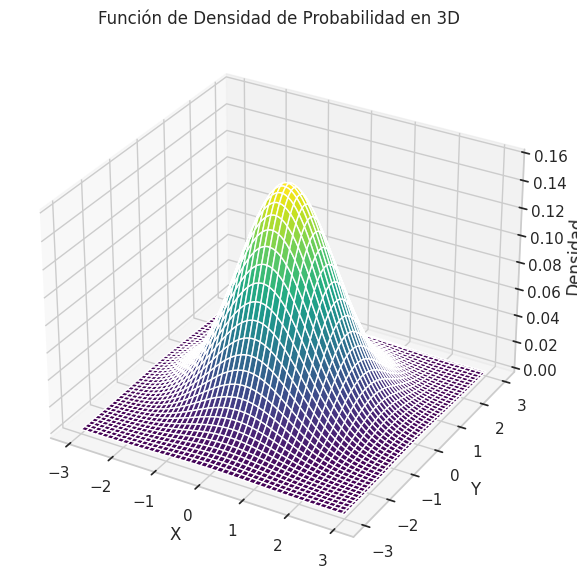

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_3d_density(mean, cov, grid_size=100):
    """Grafica la función de densidad de probabilidad (PDF) en 3D."""
    x, y = np.linspace(-3, 3, grid_size), np.linspace(-3, 3, grid_size)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Densidad')
    ax.set_title('Función de Densidad de Probabilidad en 3D')

    plt.show()

# Ejemplo de distribución normal bivariada
mean = [0, 0]  # Media en (0,0)
cov = [[1, 0], [0, 1]]  # Matriz de covarianza identidad

plot_3d_density(mean, cov)

## Función de Densidad de Mezcla de Normales

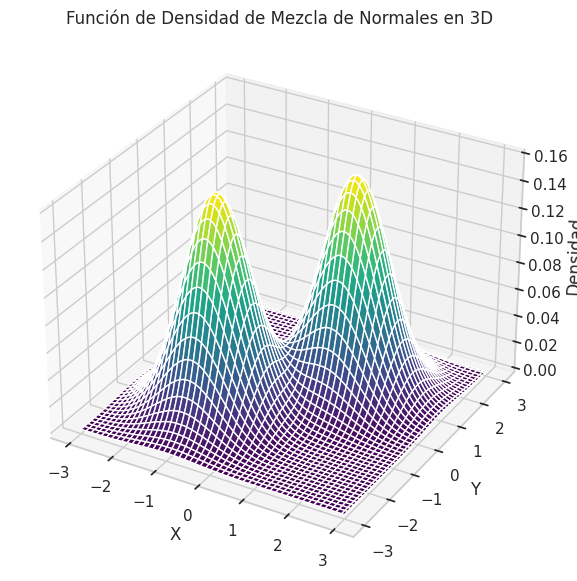

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def mixture_density(x, y, means, covariances, weights):
    """Calcula la densidad de una mezcla de distribuciones normales."""
    Z = np.zeros_like(x)
    for mean, cov, weight in zip(means, covariances, weights):
        rv = multivariate_normal(mean, cov)
        Z += weight * rv.pdf(np.dstack((x, y)))
    return Z

def plot_3d_mixture_density(means, covariances, weights, grid_size=100):
    """Grafica la función de densidad de probabilidad de una mezcla de normales en 3D."""
    x, y = np.linspace(-3, 3, grid_size), np.linspace(-3, 3, grid_size)
    X, Y = np.meshgrid(x, y)
    Z = mixture_density(X, Y, means, covariances, weights)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Densidad')
    ax.set_title('Función de Densidad de Mezcla de Normales en 3D')

    plt.show()

# Ejemplo de mezcla de dos distribuciones normales bivariadas
means = [[-1, -1], [1, 1]]  # Medias de las distribuciones
covariances = [[[0.5, 0], [0, 0.5]], [[0.5, 0], [0, 0.5]]]  # Covarianzas
weights = [0.5, 0.5]  # Pesos de cada distribución

plot_3d_mixture_density(means, covariances, weights)

Esperanza (Media): [ 0.00138587 -0.00018042]
Varianza: [0.01128233 0.01114894]
Matriz de Covarianza:
[[1.12834586e-02 4.92894357e-05]
 [4.92894357e-05 1.11500500e-02]]


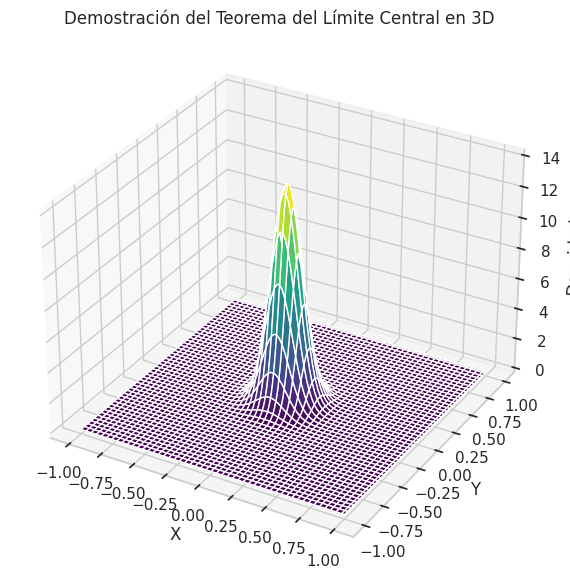

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def central_limit_theorem_3d(num_samples=10000, sample_size=30, grid_size=100):
    """Demuestra el Teorema del Límite Central en 3D con varianza, esperanza y distribución de densidad."""

    # Generamos muestras de una distribución uniforme
    samples = np.random.uniform(-1, 1, size=(num_samples, sample_size, 2))

    # Calculamos la media de cada muestra
    sample_means = np.mean(samples, axis=1)

    # Estimamos la esperanza (media) y varianza de la distribución resultante
    mean = np.mean(sample_means, axis=0)
    var = np.var(sample_means, axis=0)
    cov = np.cov(sample_means, rowvar=False)

    # Imprimir valores de interés
    print(f"Esperanza (Media): {mean}")
    print(f"Varianza: {var}")
    print(f"Matriz de Covarianza:\n{cov}")

    # Crear una malla para la visualización
    x, y = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Definir la distribución normal que debería aparecer según el TLC
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    # Graficar la densidad en 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Densidad')
    ax.set_title('Demostración del Teorema del Límite Central en 3D')

    plt.show()

# Ejecutar la demostración
central_limit_theorem_3d()

Esperanza Teórica: [0 0]
Varianza de las medias acumuladas: [0.00014836 0.0003359 ]
Matriz de Covarianza:
[[0.00014838 0.00012983]
 [0.00012983 0.00033593]]


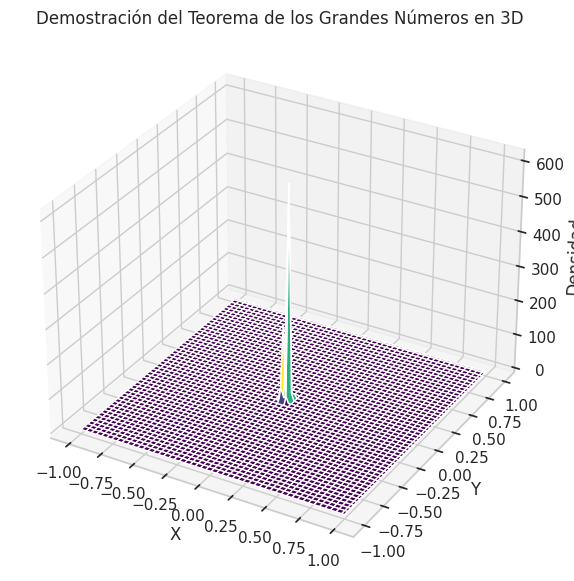

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def law_of_large_numbers_3d(num_samples=10000, grid_size=100):
    """Demuestra el Teorema de los Grandes Números en 3D."""

    # Generamos muestras de una distribución uniforme
    samples = np.random.uniform(-1, 1, size=(num_samples, 2))

    # Calculamos la media acumulada a lo largo de las muestras
    cumulative_means = np.cumsum(samples, axis=0) / np.arange(1, num_samples + 1)[:, None]

    # Estimamos la esperanza teórica de la distribución uniforme (-1,1), que es 0
    expected_value = np.array([0, 0])

    # Crear una malla para la visualización
    x, y = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # Estimamos la varianza de las medias acumuladas
    var = np.var(cumulative_means, axis=0)
    cov = np.cov(cumulative_means.T)

    # Imprimir valores de interés
    print(f"Esperanza Teórica: {expected_value}")
    print(f"Varianza de las medias acumuladas: {var}")
    print(f"Matriz de Covarianza:\n{cov}")

    # Definir la distribución normal aproximada según la convergencia
    rv = multivariate_normal(expected_value, cov)
    Z = rv.pdf(pos)

    # Graficar la convergencia en 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Densidad')
    ax.set_title('Demostración del Teorema de los Grandes Números en 3D')

    plt.show()

# Ejecutar la demostración
law_of_large_numbers_3d()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

## Simulación de la LGN
Simularemos los lanzamientos de un dado y calcularemos la media
$$ \Omega = \{1,2,3,4,5,6 \}$$

La media teórica:
$$ \{E}[X] = 3.5 \$$

In [32]:
np.random.seed(42) # números pseudoaleatorios sean reproducibles
lanzamientos = np.random.randint(1,7,1000)

In [38]:
media_acum = np.cumsum(lanzamientos) / np.arange(1,1001)
media_acum
df = pd.DataFrame({'lanzamientos': np.arange(1,1001), 'media_acum':media_acum})
df

,lanzamientos,media_acum
0,1,4.000000
1,2,4.500000
2,3,4.000000
3,4,4.250000
4,5,4.400000
...,...,...
995,996,3.458835
996,997,3.460381
997,998,3.457916
998,999,3.455455


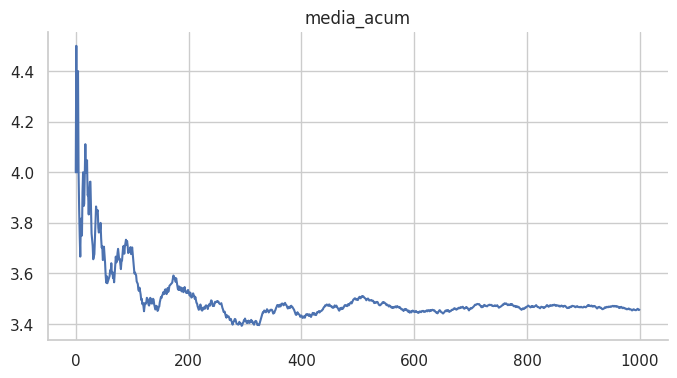

In [39]:
# @title media_acum

from matplotlib import pyplot as plt
df['media_acum'].plot(kind='line', figsize=(8, 4), title='media_acum')
plt.gca().spines[['top', 'right']].set_visible(False)

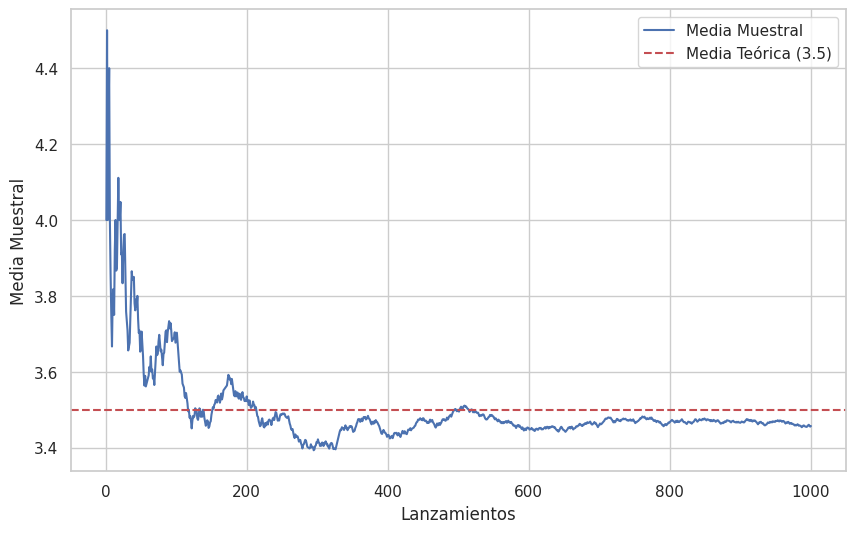

In [40]:
plt.figure(figsize=(10,6))
plt.plot(df['lanzamientos'], df['media_acum'], label='Media Muestral')
plt.axhline(3.5, color='r', linestyle='--', label='Media Teórica (3.5)')
plt.xlabel('Lanzamientos')
plt.ylabel('Media Muestral')
plt.legend()
plt.grid(True)
plt.show()

## Problema de la aguja de Buffon


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def buffon_needle_2d(num_needles, needle_length, line_spacing):
    crosses = 0
    np.random.seed(42)  # Para reproducibilidad

    for _ in range(num_needles):
        # Posición aleatoria del centro de la aguja (y ∈ [0, D])
        y_center = np.random.uniform(0, line_spacing)

        # Ángulo aleatorio (θ ∈ [0, π])
        theta = np.random.uniform(0, np.pi)

        # Extremos de la aguja
        y_tip1 = y_center + (needle_length / 2) * np.sin(theta)
        y_tip2 = y_center - (needle_length / 2) * np.sin(theta)

        # Verificar si cruza alguna línea
        if (y_tip1 // line_spacing) != (y_tip2 // line_spacing):
            crosses += 1

    # Evitar división por cero
    if crosses == 0:
        return float('inf')

    # Estimación de π
    probability = crosses / num_needles
    pi_estimate = (2 * needle_length) / (line_spacing * probability)

    return pi_estimate

# Parámetros
num_needles = 100000
needle_length = 1
line_spacing = 2  # D ≥ L

pi_estimate = buffon_needle_2d(num_needles, needle_length, line_spacing)
print(f"Estimación de π: {pi_estimate:.6f}")

Estimación de π: 3.154972


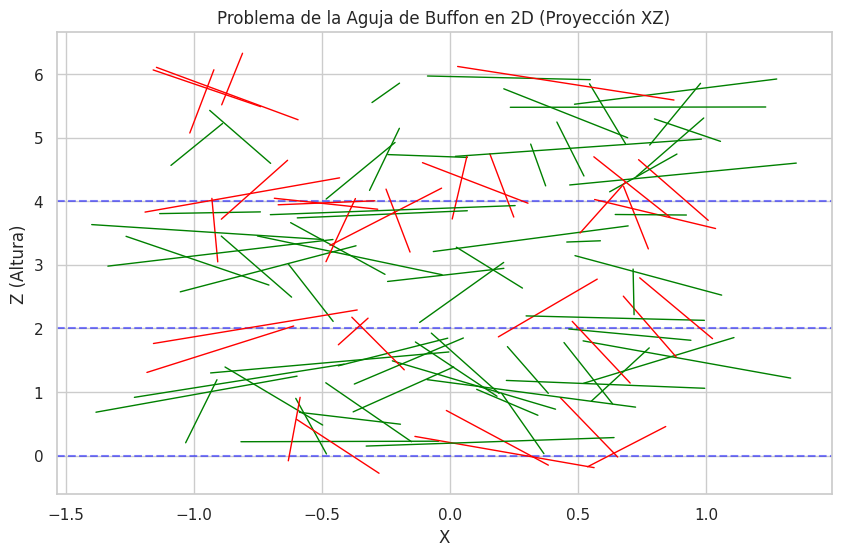

Estimación de π en 2D: 3.132832


In [47]:
import numpy as np
import matplotlib.pyplot as plt

def buffon_needle_2d_projection(num_needles, needle_length, plane_spacing):
    crosses = 0
    np.random.seed(42)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Dibujar líneas horizontales (los planos)
    for z in np.arange(0, 3 * plane_spacing, plane_spacing):
        ax.axhline(y=z, color='blue', linestyle='--', alpha=0.5)

    for i in range(num_needles):
        # Posición aleatoria del centro de la aguja
        x_center = np.random.uniform(-1, 1)  # Coordenada X
        z_center = np.random.uniform(0, 3 * plane_spacing)  # Coordenada Z

        # Orientación aleatoria en 3D (ángulos θ y φ)
        theta = np.random.uniform(0, 2 * np.pi)  # Ángulo en el plano XY
        phi = np.random.uniform(0, np.pi)  # Ángulo respecto al eje Z

        # Calcular extremos de la aguja (proyectando en 2D: eje X y Z)
        dx = (needle_length / 2) * np.sin(phi) * np.cos(theta)
        dz = (needle_length / 2) * np.cos(phi)

        x_tip1 = x_center + dx
        z_tip1 = z_center + dz
        x_tip2 = x_center - dx
        z_tip2 = z_center - dz

        # Comprobar si la aguja cruza un plano (mirando los valores de Z)
        z_plane_1 = np.floor(z_tip1 / plane_spacing)
        z_plane_2 = np.floor(z_tip2 / plane_spacing)

        if z_plane_1 != z_plane_2:
            crosses += 1
            color = 'red'
        else:
            color = 'green'

        # Dibujar solo algunas agujas para mejor visualización
        if i < 100:
            ax.plot([x_tip1, x_tip2], [z_tip1, z_tip2], color=color, linewidth=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Z (Altura)')
    ax.set_title('Problema de la Aguja de Buffon en 2D (Proyección XZ)')
    plt.show()

    # Evitar división por cero
    if crosses == 0:
        return float('inf')

    # Estimación de π
    probability = crosses / num_needles
    pi_estimate = (2 * needle_length) / (plane_spacing * probability)

    return pi_estimate

# Parámetros
num_needles = 5000  # Mayor número de agujas para mejor precisión
needle_length = 1
plane_spacing = 2

# Estimación de π en 2D (proyección XZ)
pi_estimate_2d = buffon_needle_2d_projection(num_needles, needle_length, plane_spacing)
print(f"Estimación de π en 2D: {pi_estimate_2d:.6f}")